<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Spring25/linearreg_torch_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

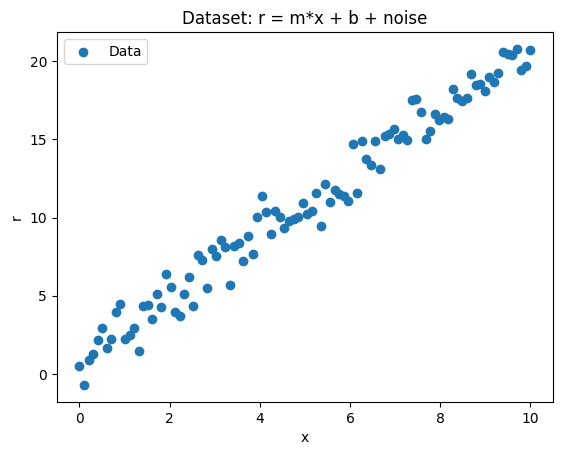

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset
np.random.seed(420)
n_samples = 100
true_m = 2.0
true_b = 1.0
noise_std = 1.0

# Generate input data
x = np.linspace(0, 10, n_samples)
# Generate noise and target data
noise = np.random.randn(n_samples) * noise_std
r = true_m * x + true_b + noise

# Plot the data (optional)
plt.scatter(x, r, label="Data")
plt.xlabel("x")
plt.ylabel("r")
plt.title("Dataset: r = m*x + b + noise")
plt.legend()
plt.show()


In [23]:
# Grid search to find m and b
m_values = np.linspace(0, 4, 100)
b_values = np.linspace(-1, 3, 100)
best_loss = float('inf')
best_m, best_b = None, None

for m in m_values:
    for b in b_values:
        y_pred = m * x + b
        loss = np.mean((r - y_pred)**2)
        if loss < best_loss:
            best_loss = loss
            best_m = m
            best_b = b

print("Grid Search Best Parameters:")
print("Estimated m =", best_m)
print("Estimated b =", best_b)
print("Best MSE Loss =", best_loss)


Grid Search Best Parameters:
Estimated m = 1.97979797979798
Estimated b = 0.9797979797979799
Best MSE Loss = 0.9503263169620358


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Splitting the dataset
train_data, test_data, train_targets, test_targets = train_test_split(
    x, r, test_size=0.2
)

# PyTorch: Build and train a simple linear model
# Convert data to torch tensors and reshape for the model
train_data = torch.tensor(train_data, dtype=torch.float32).unsqueeze(1)
train_targets = torch.tensor(train_targets, dtype=torch.float32).unsqueeze(1)
test_data = torch.tensor(test_data, dtype=torch.float32).unsqueeze(1)
test_targets = torch.tensor(test_targets, dtype=torch.float32).unsqueeze(1)


num_epochs = 100

# Create the model
model = nn.Sequential(
    nn.Linear(1, 1)
)

# Initialize the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

#Define the loss
criterion = nn.MSELoss(reduction='sum') #sum of (r-y)**2 values

batch_size = 16
train_dataset = TensorDataset(train_data, train_targets)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_data, test_targets)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for batch_data, batch_labels in train_loader: #x,r values are picked randomly
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()

    mean_training_loss = total_loss / len(train_loader.dataset)

    if epoch % 10 > 0 and epoch!=num_epochs-1:
        continue

    # Validation
    model.eval()
    with torch.no_grad():
        total_val_loss = 0.0
        for batch_data, batch_labels in test_loader:
            val_outputs = model(batch_data)
            val_loss = criterion(val_outputs, batch_labels)
            total_val_loss += val_loss.item()

        mean_val_loss = total_val_loss / len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {mean_training_loss:.4f}, Val Loss: {mean_val_loss:.4f}")


# Extract the learned parameters: weight and bias
torch_params = list(model.parameters())
torch_m = torch_params[0].item()  # weight (assuming one input, one output)
torch_b = torch_params[1].item()  # bias

print("\nPyTorch Learned Parameters:")
print("Estimated m =", torch_m)
print("Estimated b =", torch_b)


Epoch 1/100, Training Loss: 38.1212, Val Loss: 1.3207
Epoch 11/100, Training Loss: 1.0555, Val Loss: 1.1924
Epoch 21/100, Training Loss: 0.9758, Val Loss: 1.1133
Epoch 31/100, Training Loss: 0.9988, Val Loss: 1.0850
Epoch 41/100, Training Loss: 1.1295, Val Loss: 1.2192
Epoch 51/100, Training Loss: 0.9452, Val Loss: 1.0362
Epoch 61/100, Training Loss: 0.9422, Val Loss: 1.0855
Epoch 71/100, Training Loss: 1.0090, Val Loss: 1.0336
Epoch 81/100, Training Loss: 0.9329, Val Loss: 1.0336
Epoch 91/100, Training Loss: 0.9317, Val Loss: 1.0378
Epoch 100/100, Training Loss: 0.9273, Val Loss: 1.1465

PyTorch Learned Parameters:
Estimated m = 1.9496744871139526
Estimated b = 0.8710517287254333


In [25]:
noise.std()

np.float64(0.9746714999315105)